# Assignment 5
# Akarsh Sahu
# 10-30-2019

## 1. Data Processing

#### a) Import the data from the website directly: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [80]:
import pandas as pd
import numpy as np

In [16]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

In [17]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### b) There is no header included, but information on column names is here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names (Links to an external site.)

Scroll to the bottom of that link to see the explanation of the columns. You need to build the column names for your dataframe. It is highly encouraged to not include spaces in column names. Finally, call your target variable (the last column of ">50K" or "<=50k") "salary".

An easy way to do this is to build a list of column names, and pass those into the .columns() attribute.

In [18]:
list_of_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
adult_df.columns = list_of_columns

#### c) Check your dataframe shape to verify that you have the correct # of rows and columns. Run the following command:

You should get a shape of: (32561, 15)

In [19]:
adult_df.shape

(32561, 15)

#### d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

In [20]:
adult_df = adult_df.drop(columns = ['fnlwgt'], axis = 1)
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### f) Use the .replace() method to make the following changes to the "salary" column:

1. "<=50K" should become 0
2. ">50K" should become 1

In [21]:
adult_df.salary = adult_df.salary.replace('<=50K', 0)
adult_df.salary = adult_df.salary.replace('>50K', 1)
adult_df.salary.unique()

array([0, 1], dtype=int64)

#### g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".
#### h) Create your y dataframe (just your target variable). It should only be "salary".

In [22]:
y = adult_df.salary
X = adult_df.drop(columns = ['salary'], axis = 1)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [24]:
print( X.shape)
print(y.shape)

(32561, 13)
(32561,)


#### i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

In [28]:
X_enc = pd.get_dummies(X)
X_enc.shape

(32561, 107)

#### j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc.to_numpy(), y.to_numpy(), test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

## 2. Random Forest Classifier - Base Model:

#### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [32]:
from sklearn.ensemble import RandomForestClassifier

mdl1 = RandomForestClassifier(random_state = 42)

mdl1.fit(X_train, y_train)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [33]:
predY_1 = mdl1.predict(X_test)
predProb_1 = mdl1.predict_proba(X_test)

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [34]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_1)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_1)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[6847  608]
 [ 921 1393]]



Classification Report

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7455
           1       0.70      0.60      0.65      2314

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



#### d) Calculate the AUC score (we did this in HW #4 many times).

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predY_1)

0.7602159485289727

#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

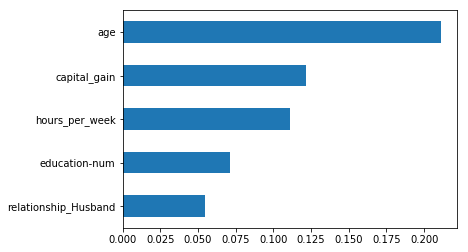

In [42]:
feat_importances = pd.Series(mdl1.feature_importances_, index=X_enc.columns)
plt = feat_importances.nlargest(5).plot(kind='barh')
plt.invert_yaxis()

#### f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [44]:
predY_tr_1 = mdl1.predict(X_train)
predProb_tr_1 = mdl1.predict_proba(X_train)

In [45]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_1)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_1)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[17033   232]
 [  465  5062]]



Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17265
           1       0.96      0.92      0.94      5527

   micro avg       0.97      0.97      0.97     22792
   macro avg       0.96      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792



There are clear signs of overfitting as precision, recall, and f1-score are significantly higher in training dataset as compared to test dataset. One of the reasons this might occur is due to lack of hyperparameter tuning which we will do in the next models.

## 3. AdaBoost Classifier - GridSearch:

#### a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:

1. n_estimators: 100, 200, 300, 400
2. learning_rate: 0.2,0.4,0.6,0.8,1, 1.2

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#create a dictionary of parameters 
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2]
}

# create Random Forest model 
ada_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
ada_Grid = GridSearchCV(ada_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [48]:
# Fit the grid search to the data
ada_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

#### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [52]:
ada_Grid.best_params_

{'learning_rate': 1.2, 'n_estimators': 400}

In [53]:
ada_mdl = ada_Grid.best_estimator_

In [54]:
predY_2 = ada_mdl.predict(X_test)
predProb_2 = ada_mdl.predict_proba(X_test)

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [55]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_2)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_2)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[7008  447]
 [ 807 1507]]



Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



#### d) Calculate the AUC score

In [56]:
roc_auc_score(y_test, predY_2)

0.7956467412947869

#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

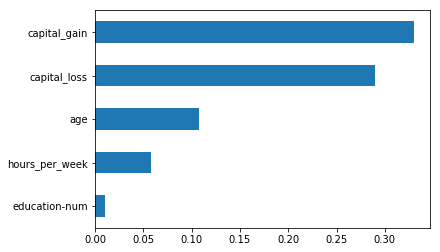

In [57]:
feat_importances = pd.Series(ada_mdl.feature_importances_, index=X_enc.columns)
plt = feat_importances.nlargest(5).plot(kind='barh')
plt.invert_yaxis()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [64]:
predY_tr_2 = ada_mdl.predict(X_train)
predProb_tr_2 = ada_mdl.predict_proba(X_train)

In [65]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_2)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_2)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[16247  1018]
 [ 1902  3625]]



Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

   micro avg       0.87      0.87      0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



There's no sign of overfitting as the model metrics of the training dataset are comparable to that of the test dataset.

## 4. Gradient Boosting Classifier - GridSearch:

#### a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

1. n_estimators: 100,200, 300 & 400
2. learning_rate: choose 3 learning rates of your choice
3. max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#create a dictionary of parameters 
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2],
    'max_depth': [1,2]
}

# create Random Forest model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_Grid = GridSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [62]:
# Fit the grid search to the data
gb_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 26.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

#### b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [87]:
gb_Grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

In [88]:
print(gb_Grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}


In [67]:
gb_mdl = gb_Grid.best_estimator_

In [68]:
predY_3 = gb_mdl.predict(X_test)
predProb_3 = gb_mdl.predict_proba(X_test)

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [69]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_3)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_3)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[7031  424]
 [ 814 1500]]



Classification Report

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



#### d) Calculate the AUC score

In [70]:
roc_auc_score(y_test, predY_3)

0.7956767977499105

#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

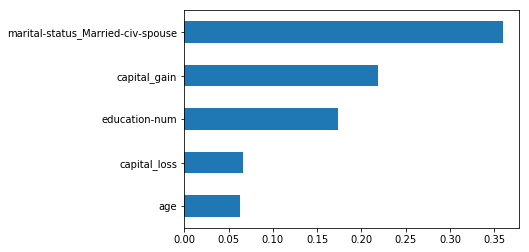

In [71]:
feat_importances = pd.Series(gb_mdl.feature_importances_, index=X_enc.columns)
plt = feat_importances.nlargest(5).plot(kind='barh')
plt.invert_yaxis()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [72]:
predY_tr_3 = gb_mdl.predict(X_train)
predProb_tr_3 = gb_mdl.predict_proba(X_train)

In [73]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_3)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_3)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[16388   877]
 [ 1828  3699]]



Classification Report

               precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

   micro avg       0.88      0.88      0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



Again, we don't see any significant signs of overfitting as the model metrics of the training and test dataset are comparable.

## 5. XGBoost - RandomizedSearchCV

#### Repeat 4(a) - 4(f) with xgboost and RandomizedSearchCV.

For 4a use the following parameters: 

1. n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
2. learning_rate: 0.1 - 1.6 in increments of 0.1
3. max_depth: 1, 2
4. gamma: 0 - 5 in increments of 0.25

Note: For parameters with increments please don't feel the need to type each value by hand. There are better ways to handle this. Post in discussion thread if you are struggling.

For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".

In [75]:
!pip install xgboost

In [78]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xg_obj = xgb.XGBClassifier()

param_grid = {
        'max_depth': [1,2],
        'learning_rate': np.arange(0.1, 1.7, 0.1).tolist(),
        'gamma': np.arange(0, 5.25, 0.25).tolist(),
        'n_estimators': np.arange(100, 1100, 100).tolist()}

xg_Grid = RandomizedSearchCV(xg_obj, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=5,
                            scoring='roc_auc', random_state=42)


In [79]:
# Fit the grid search to the data
xg_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5, total=   3.6s
[CV] n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5, total=   3.8s
[CV] n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5 
[CV]  n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5, total=   4.3s
[CV] n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5 
[CV]  n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5, total=   3.9s
[CV] n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5 
[CV]  n_estimators=100, max_depth=1, learning_rate=1.2000000000000002, gamma=0.5, total=   4.1s
[CV] n_estimators=100, max_depth=2, learning_rate=1.4000000000000001, gamma=4.0 
[CV]  n_estimators=100, max_depth=2, learning_rate=1.4000000000000001, gamma=4.0, total=   6.7s
[CV] n_estimators=100, max_depth=2, learning_rate=1.4000000000000001, gamma=4.0 
[CV]  n_estimators=100, max_depth=2, learning_rate=1.4000000000000001, gamma=4.0, total=   7.1s
[CV] n_estimators=1

[CV]  n_estimators=700, max_depth=1, learning_rate=1.4000000000000001, gamma=3.25, total=  35.7s
[CV] n_estimators=700, max_depth=1, learning_rate=1.4000000000000001, gamma=3.25 
[CV]  n_estimators=700, max_depth=1, learning_rate=1.4000000000000001, gamma=3.25, total=  38.5s
[CV] n_estimators=700, max_depth=1, learning_rate=1.4000000000000001, gamma=3.25 
[CV]  n_estimators=700, max_depth=1, learning_rate=1.4000000000000001, gamma=3.25, total=  33.8s
[CV] n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25 
[CV]  n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25, total=  59.4s
[CV] n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25 
[CV]  n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25, total= 1.1min
[CV] n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25 
[CV]  n_estimators=900, max_depth=2, learning_rate=0.7000000000000001, gamma=4.25, total= 1.0min
[CV] n_e

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 63.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [1, 2], 'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6], 'gamma': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 100

#### b) Use the best estimator from RandomSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [81]:
xg_Grid.best_params_

{'n_estimators': 700, 'max_depth': 1, 'learning_rate': 0.8, 'gamma': 0.25}

In [82]:
xg_mdl = xg_Grid.best_estimator_

In [89]:
predY_4 = xg_mdl.predict(X_test)
predProb_4 = xg_mdl.predict_proba(X_test)

#### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [90]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_4)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_4)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[7019  436]
 [ 825 1489]]



Classification Report

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7455
           1       0.77      0.64      0.70      2314

   micro avg       0.87      0.87      0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



#### d) Calculate the AUC score

In [85]:
roc_auc_score(y_test, predY_4)

0.7924951321295679

#### e) Identify the top 5 features. Feel free to print a list OR to make a plot.

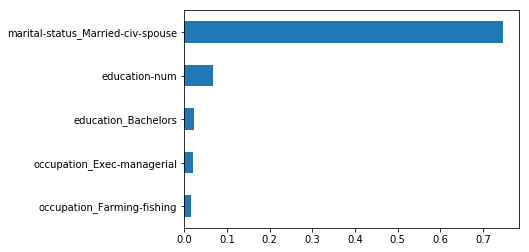

In [86]:
feat_importances = pd.Series(xg_mdl.feature_importances_, index=X_enc.columns)
plt = feat_importances.nlargest(5).plot(kind='barh')
plt.invert_yaxis()

#### f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [58]:
predY_tr_4 = xg_mdl.predict(X_train)
predProb_tr_4 = xg_mdl.predict_proba(X_train)

In [59]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_4)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_4)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[17033   232]
 [  465  5062]]



Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17265
           1       0.96      0.92      0.94      5527

   micro avg       0.97      0.97      0.97     22792
   macro avg       0.96      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792



There are signs of overfitting. The difference between the classification reports for Test vs Train is significant (i.e. the accuracy scores are 0.92 vs 0.98, slight difference in other metrics.

## 6. Moving into Conceptual Problems:

#### a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

Alpha = Predictor's weight - The more accurate the predictor is, the higher its weight will be. If it is just guessing randomly, then its weight will be close to zero. However, if it is less accurate than random guessing or mostly wrong, then its weight will be negative. Predictors have different weights depending on their overall accuracy on the weighted training set.

Source: Hands on Machine Learning v2

#### b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

To make predictions, AdaBoost computes the predictions of all the predictors and weighs them using the predictor weights α. The predicted class is the one that receives the majority of weighted votes.

Steps in detail:

1. Each instance weight w is initially set to 1/m -> The first predictor is trained and its weighted error rate r is computed on the training set -> The predictor’s weight α is then computed -> instance weights are updated -> All the instance weights are normalized.

2. Finally, a new predictor is trained using the updated weights, and the whole process is repeated (the new predictor’s weight is computed, the instance weights are updated, then another predictor is trained, and so on). The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.

3. To make predictions, AdaBoost computes the predictions of all the predictors and weighs them using the predictor weights α. The predicted class is the one that receives the majority of weighted votes.

Source: Hands on Machine Learning v2

#### c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

The max_depth is the maximum depth of a tree - this indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. It is used to control the complexity of the tree, more specifically, it is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample and usually (should be) tuned using CV.

#### d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

"Education_Num" showed up for all the 4 models.

No. of years of education is a strong predictor of salary. More educated individual will earn more as compared to less educated individual

Also, "Capital Gain" came up to be significant in 3 out of 4 models 

Capital Gain probably has very high predictive power because it is "income from investment sources, apart from wages / salary". An individual who is wealthy enough (make enough money from salary, meaning >50k) would participate in investment activities and generate income from those investement activities.

#### e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

AdaBoost, Gradient Boosting and XGBoost all performed pretty well and all had very similar numbers from the Classification Report for the test data. But Gradient Boosting and AdaBoost both performed slightly better than AdaBoost in terms of overfitting and had identical numbers for Precision, Recall and F1-score. So the top performing models for this exercise is: GB and XGB.

Optimal hyperparameters for GradBoost:

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

Optimal hyperparameters for AdaBoost:

{'learning_rate': 1.2, 'n_estimators': 400}

#### f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

I am going to select GB as the best performing model for this exercise and plot out the ROC curve

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

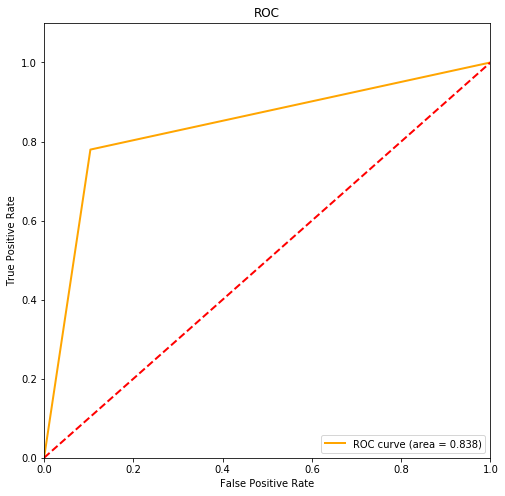

In [92]:
fpr, tpr, thresholds = roc_curve(predY_3, y_test)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color = 'orange', lw=lw, label = 'ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0,1], color = 'red', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

The ROC curve illustrates the classification ability of the binary classifier (Gradient Boost in this case) as its discrimination threshold is varied. The x-axis and y-axis are the proportion of correctly classified data points (true positive rate; on the y-axis) and the proportion of "false positives" (on the x-axis).

For my reference: The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1 − specificity).